# Assignment 1: Data Pre-Processing of Historical Tropical Cyclone Records
In this assignment, you will explore how to do data exploration and pre-processing with a .csv file containing a global collection of 
tropical cyclone records, the International Best Track Archive for Climate Stewardship [(IBTrACS)](https://www.ncei.noaa.gov/products/international-best-track-archive). The column variable descriptions are given [here](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2025-04/IBTrACS_v04r01_column_documentation.pdf).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and aggregate the data set
Using the following code, load in the data set (this takes a few seconds to run):

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})

This data set includes cyclone tracks (so it has multiple entries per named cyclone). We'll use the code below to create an aggregated data set for only the named cyclones, which has one entry per cyclone. You will use the data set `dfnamed` for the rest of the assignment.

In [3]:
dfnamed = df.groupby("NAME").agg(MAX_WIND=('WMO_WIND','max'),
                               MIN_PRES=('WMO_PRES','min'),
                               MEAN_LAT=('LAT','mean'),
                               MEAN_LON=('LON','mean'),
                               BASIN=('BASIN','first'),
                               SUBBASIN=('SUBBASIN','first'),
                               NATURE=('NATURE','first'),
                               SEASON=('SEASON','first')).reset_index()
dfnamed.head()

# these lines of code remove the initial dataframe (we won't need it anymore)
import gc
del df
gc.collect()

0

## Part 1: Data Exploration

How many named cyclones are there?

In [4]:
len(dfnamed)

1884

1) Use the `pandas` `hist` method to plot the marginal distributions of the variables in the dataframe `dfnamed`

<Axes: ylabel='Count'>

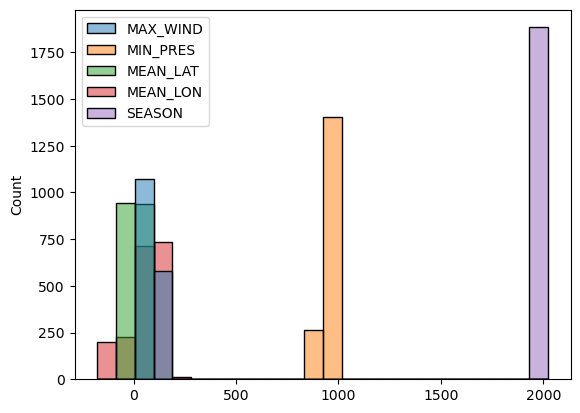

In [5]:
sns.histplot(dfnamed)

2) Use the `seaborn` Pairgrid function to create a scatterplot of all of the variables

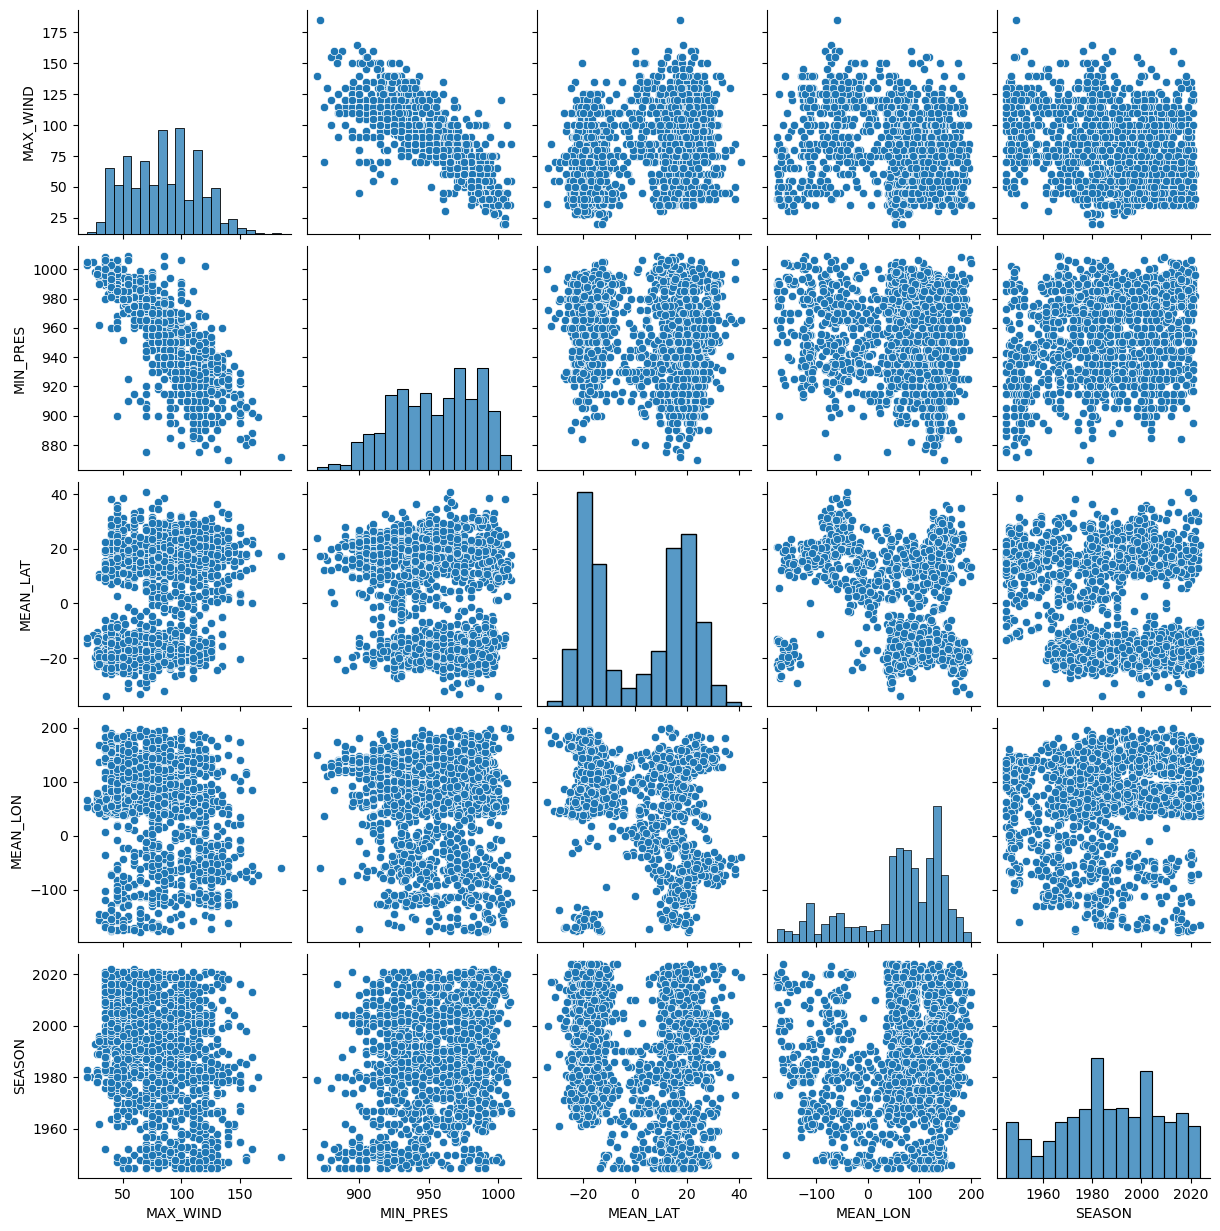

In [6]:
sns.pairplot(dfnamed)

3) Using `matplotlib`, create a scatter plot of the minimum pressure vs. the maximum wind speed and color by the year the cyclone took place.

[Text(0.5, 1.0, 'Minimum Pressure vs Maximum Wind Speed')]

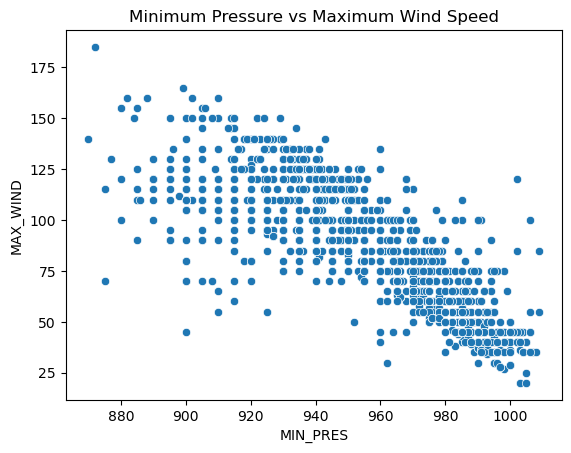

In [8]:
sns.scatterplot(data=dfnamed, x='MIN_PRES', y='MAX_WIND').set(title="Minimum Pressure vs Maximum Wind Speed")

## Part 2: Handle missing data
4) How many non-null values does each variable have?

In [14]:
dfnamed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      1884 non-null   object 
 1   MAX_WIND  1649 non-null   float64
 2   MIN_PRES  1670 non-null   float64
 3   MEAN_LAT  1884 non-null   float64
 4   MEAN_LON  1884 non-null   float64
 5   BASIN     1884 non-null   object 
 6   SUBBASIN  1884 non-null   object 
 7   NATURE    1884 non-null   object 
 8   SEASON    1884 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 132.6+ KB


In [11]:
dfnamed.isna().sum()

NAME          0
MAX_WIND    235
MIN_PRES    214
MEAN_LAT      0
MEAN_LON      0
BASIN         0
SUBBASIN      0
NATURE        0
SEASON        0
dtype: int64

5) Create a new dataframe called `dfdrop` where you have discarded the rows with NaN values in `dfnamed`

In [24]:
dfdrop = dfnamed.dropna(axis=0, how='any')

In [25]:
dfdrop.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 1 to 1883
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      1608 non-null   object 
 1   MAX_WIND  1608 non-null   float64
 2   MIN_PRES  1608 non-null   float64
 3   MEAN_LAT  1608 non-null   float64
 4   MEAN_LON  1608 non-null   float64
 5   BASIN     1608 non-null   object 
 6   SUBBASIN  1608 non-null   object 
 7   NATURE    1608 non-null   object 
 8   SEASON    1608 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 125.6+ KB


6. Create a new dataframe called `dfimputed` where you have imputed the missing values in `dfnamed` with 0.0.

In [26]:
dfimputed = dfnamed.fillna(0.0)

In [27]:
dfimputed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      1884 non-null   object 
 1   MAX_WIND  1884 non-null   float64
 2   MIN_PRES  1884 non-null   float64
 3   MEAN_LAT  1884 non-null   float64
 4   MEAN_LON  1884 non-null   float64
 5   BASIN     1884 non-null   object 
 6   SUBBASIN  1884 non-null   object 
 7   NATURE    1884 non-null   object 
 8   SEASON    1884 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 132.6+ KB


## Part 3: Feature scaling

7. Scale the `MAX_WIND`using the StandardScaler and put it into an array called `y`, since its the target we want to predict 

In [28]:
from sklearn.preprocessing import StandardScaler

In [57]:
std_scaler = StandardScaler()
y = std_scaler.fit_transform(dfdrop[['MAX_WIND']])

8. Create a copy of your `dfdrop` dataframe called `dffeatures`, and drop the `NAME` and `MAX_WIND` columns from your `dffeatures` dataframe, since the `MAX_WIND` variable is going to be your target variable and we won't need the cyclone names any longer

In [31]:
dffeatures = dfdrop.drop(columns=['NAME', 'MAX_WIND'])

In [32]:
dffeatures.columns

Index(['MIN_PRES', 'MEAN_LAT', 'MEAN_LON', 'BASIN', 'SUBBASIN', 'NATURE',
       'SEASON'],
      dtype='object')

## Part 4: Encode Categorical Variables
9) Check which unique categories each of the variables `BASIN`, `SUBBASIN`, and `NATURE` take, using the `dffeatures` dataframe.

In [38]:
dffeatures['BASIN'].unique()

array(['SI', 'NA', 'WP', 'SP', 'EP', 'NI'], dtype=object)

In [39]:
dffeatures['SUBBASIN'].unique()

array(['MM', 'NA', 'EA', 'WA', 'BB', 'CP', 'GM', 'AS', 'CS'], dtype=object)

In [40]:
dffeatures['NATURE'].unique()

array(['TS', 'NR', 'MX', 'SS', 'ET', 'DS'], dtype=object)

10. Print out the number of cyclones in each basin and subbasin. Also print out how many of each storm type there is.

In [34]:
dffeatures['BASIN'].value_counts()

BASIN
SI    513
WP    449
SP    244
EP    174
NA    169
NI     59
Name: count, dtype: int64

In [35]:
dffeatures['SUBBASIN'].value_counts()

SUBBASIN
MM    1076
WA     184
NA     112
EA      88
BB      38
CS      33
CP      32
GM      24
AS      21
Name: count, dtype: int64

In [37]:
dffeatures['NATURE'].value_counts()

NATURE
TS    1091
NR     471
DS      23
SS      15
ET       6
MX       2
Name: count, dtype: int64

11. Encode the `BASIN`, `SUBBASIN`, and `NATURE` variables in `dffeatures` using One Hot Encoding, and standardize `MIN_PRES`, `MEAN_LAT`, and `MEAN_LON`, and `SEASON` using the `StandardScaler`.

*Hint*: you can do this in one step using the `sci-kit learn` `ColumnTransformer`. Create an array called `X` that contains the encoded categorical variables and the scaled numerical variables.

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
dffeatures.columns

Index(['MIN_PRES', 'MEAN_LAT', 'MEAN_LON', 'BASIN', 'SUBBASIN', 'NATURE',
       'SEASON'],
      dtype='object')

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [46]:
cat_cols = ['BASIN', 'SUBBASIN', 'NATURE']
num_col = ['MIN_PRES', 'MEAN_LAT', 'MEAN_LON','SEASON']

In [47]:
cat_pipeline = make_pipeline(OneHotEncoder())
num_pipeline = make_pipeline(StandardScaler())

In [ ]:
preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_col),
    ("cat",cat_pipeline,cat_cols)])

X = preprocessor.fit_transform(dffeatures)

In [66]:
X.shape

(1608, 25)

12. Print out the feature names associated with the columns in your `X` array.

In [50]:
preprocessor.get_feature_names_out()

array(['num__MIN_PRES', 'num__MEAN_LAT', 'num__MEAN_LON', 'num__SEASON',
       'cat__BASIN_EP', 'cat__BASIN_NA', 'cat__BASIN_NI', 'cat__BASIN_SI',
       'cat__BASIN_SP', 'cat__BASIN_WP', 'cat__SUBBASIN_AS',
       'cat__SUBBASIN_BB', 'cat__SUBBASIN_CP', 'cat__SUBBASIN_CS',
       'cat__SUBBASIN_EA', 'cat__SUBBASIN_GM', 'cat__SUBBASIN_MM',
       'cat__SUBBASIN_NA', 'cat__SUBBASIN_WA', 'cat__NATURE_DS',
       'cat__NATURE_ET', 'cat__NATURE_MX', 'cat__NATURE_NR',
       'cat__NATURE_SS', 'cat__NATURE_TS'], dtype=object)

## Part 5: Train, Validation, & Test Split

13. Split your data set into a training and test/validation data set using the `train_test_split` function with 80% of your original data for training and 20% for the testing and validation data sets.

In [53]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state= 42)

14. Split your `X_test_val` and `y_test_val` again into separate validation and test data sets, that are 10% each of the original data set. Double check that the size of your final training, validation, and test data sets are correct by printing out the shape of each array.

In [59]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=.5, random_state=42)

In [61]:
X.shape

(1608, 25)

In [60]:
print(X_train.shape, X_val.shape, X_test.shape)

(1286, 25) (161, 25) (161, 25)


15. Save the Training, validation, and test data sets and labels as numpy arrays using np.save()

In [63]:
import numpy as np

In [65]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

## Part 6: Create your Assignments Repository
To turn in this and other homework assignments for this course, you will create an assignments `github` repository.
- Create a new directory called `ml4climate2025` in your home directory.
- Create a `Readme.md` markdown file that contains your name.
- Initialize a new git repository
- Add the file and make your first commit
- Create a new **private** repository on Github called `ml4climate2025`. (Call it exactly like that. Do not vary the spelling, capitalization, or punctuation.)
- Push your `ml4climate2025` repository to Github.
- On Github, go to "settings"->"collaborators", and add `kdlamb` and `ChhaviDixit`
- Push new commits to this repository whenever you are ready to hand in your assignments.